# 4강. Deep Learning from Basic Method with Keras

# Activation Funtion

In [1]:
#numpy를 import
import numpy as np
# matplotlib을 import
import matplotlib.pylab as plt

In [2]:
def sigmoid(x):
    return 1./(1.+ np.exp(-x))

In [3]:
print("sigmoid(-2):", sigmoid(-2))
print("sigmoid(-1):", sigmoid(-1))
print("sigmoid(0):", sigmoid(0))
print("sigmoid(1):", sigmoid(1))
print("sigmoid(2):", sigmoid(2))

sigmoid(-2): 0.11920292202211755
sigmoid(-1): 0.2689414213699951
sigmoid(0): 0.5
sigmoid(1): 0.7310585786300049
sigmoid(2): 0.8807970779778823


In [4]:
print("sigmoid([-2, -1, 0, 1, 2]):", sigmoid(np.array([-2, -1, 0, 1, 2])))

sigmoid([-2, -1, 0, 1, 2]): [0.11920292 0.26894142 0.5        0.73105858 0.88079708]


In [8]:
# linspace를 이용하여 특정 범위 안의 값을 선형 스케일로 생성할 수 있음
res_of_linspace = np.linspace(-6, 6, 200)
print("shape:", res_of_linspace.shape)
print("values (0 to 5):", res_of_linspace[:5])
print("values (-5 to -1):", res_of_linspace[-5:])

shape: (200,)
values (0 to 5): [-6.         -5.93969849 -5.87939698 -5.81909548 -5.75879397]
values (-5 to -1): [5.75879397 5.81909548 5.87939698 5.93969849 6.        ]


In [9]:
def tanh(x):
    return np.tanh(x)

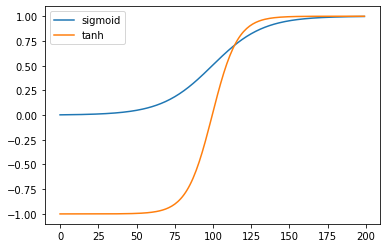

In [10]:
plt.plot(sigmoid(res_of_linspace), label='sigmoid')
plt.plot(tanh(res_of_linspace), label='tanh')
plt.legend()
plt.show()

In [11]:
#perceptron정의r
def perceptron(X, W, b, activation):
    v = 0
    for x, w in zip(X, W):
        v += x*w
    v += b
    
    return activation(v)

In [12]:
# x가 3개의 feature를 가지고 있는 1차원 벡터
X0 = [1, 1, 1]
W0 = [0, 0.5, 2]
B0 = 3
print('X0 by sigmoid:', perceptron(X0, W0, B0, sigmoid))
print('X0 by tanh:', perceptron(X0, W0, B0, tanh))
print('X0 by linear:', perceptron(X0, W0, B0, lambda x:x))

X0 by sigmoid: 0.995929862284104
X0 by tanh: 0.9999665971563038
X0 by linear: 5.5


In [13]:
# x가 4개의 feature를 가지고 있는 1차원 벡터
X1= [2, 5, 2, 5]
W1= [-2, -1.2, 0.5, 0.2]
B1= 1.2
print('X1 by sigmoid:', perceptron(X1, W1, B1, sigmoid))
print('X1 by tanh:', perceptron(X1, W1, B1, tanh))
print('X1 by linear:', perceptron(X1, W1, B1, lambda x:x))

X1 by sigmoid: 0.0011125360328603216
X1 by tanh: -0.9999975190129178
X1 by linear: -6.8


# AND Gate
$$ f(x_1, x_2) = x_1 + x_2 - 2 >= 0 \nonumber $$

In [14]:
print(perceptron([0, 0], [1,1], -2, lambda x:x>=0)) #0, 0
print(perceptron([0, 1], [1,1], -2, lambda x:x>=0)) #0, 1
print(perceptron([1, 0], [1,1], -2, lambda x:x>=0)) #1, 0
print(perceptron([1, 1], [1,1], -2, lambda x:x>=0)) #1, 1

False
False
False
True


In [15]:
# and gate 모델
def and_gate(x1, x2):
    X = [x1, x2]
    W = [1, 1]
    b = -2
    activation = lambda x:x>=0
    
    return perceptron(X, W, b, activation)

In [16]:
print(and_gate(0, 0))
print(and_gate(0, 1))
print(and_gate(1, 0))
print(and_gate(1, 1))

False
False
False
True


# OR Gate

$$ f(x_1, x_2) = x_1 + x_2 - 1 >= 0 \nonumber $$

In [17]:
print(perceptron([0, 0], [1,1], -1, lambda x:x>=0)) #0, 0
print(perceptron([0, 1], [1,1], -1, lambda x:x>=0)) #0, 1
print(perceptron([1, 0], [1,1], -1, lambda x:x>=0)) #1, 0
print(perceptron([1, 1], [1,1], -1, lambda x:x>=0)) #1, 1

False
True
True
True


In [18]:
# or gate 모델
def or_gate(x1, x2):
    X = [x1, x2]
    W = [1, 1]
    b = -1
    activation = lambda x:x>=0
    
    return perceptron(X, W, b, activation)

In [32]:
print(or_gate(0, 0))
print(or_gate(0, 1))
print(or_gate(1, 0))
print(or_gate(1, 1))

False
True
True
True


# 몬테카를로 방법(MCM)

* 6면 주사위의 어떤 면이 나올 확률이 정말 1/6인지 알아본다.

In [19]:
#1부터 6의 값을 random으로 반환하는 함수
def dice():
    return np.random.randint(1, 7)

In [22]:
# 6번의 주사위를 던진다면 1~6이 1번씩 나올까?
print(dice()) # 1번시행
print(dice()) # 2번시행
print(dice()) # 3번시행
print(dice()) # 4번시행
print(dice()) # 5번시행
print(dice()) # 6번시행

1
4
1
3
1
6


In [23]:
# 주사위를 x번 만큼 돌리고 숫자가 나온 회수를 저장하는 함수
def do_dice(x):
    total = {1:0, 2:0, 3:0, 4:0, 5:0, 6:0}
    for i in range(1, x + 1):
        total[dice()] += 1.0

    distrib = {}
    for key, count in total.items():
        distrib[key] = total[key]/float(sum(total.values()))
    return distrib

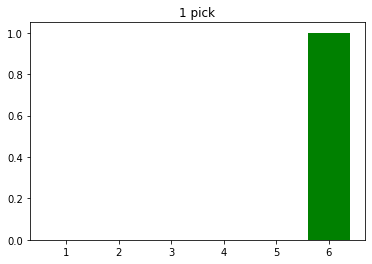

In [27]:
res_of_1pick = do_dice(1) # 1번시행
plt.bar(list(res_of_1pick.keys()), res_of_1pick.values(), color='g')
plt.title("1 pick")
plt.show()

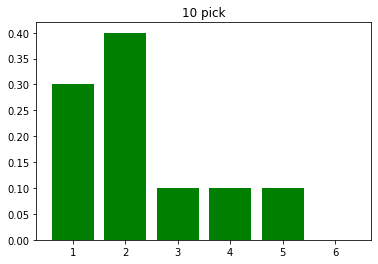

In [31]:
res_of_10pick = do_dice(10) # 10번시행
plt.bar(list(res_of_10pick.keys()), res_of_10pick.values(), color='g')
plt.title("10 pick")
plt.show()

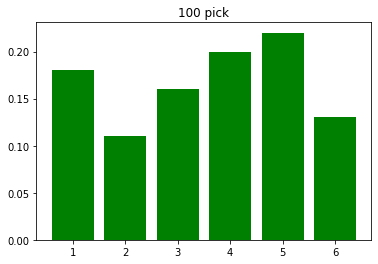

In [35]:
res_of_100pick = do_dice(100) # 100번시행
plt.bar(list(res_of_100pick.keys()), res_of_100pick.values(), color='g')
plt.title("100 pick")
plt.show()

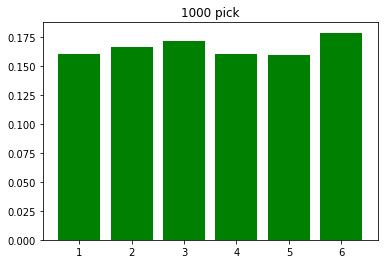

In [38]:
res_of_1000pick = do_dice(1000) # 1000번시행
plt.bar(list(res_of_1000pick.keys()), res_of_1000pick.values(), color='g')
plt.title("1000 pick")
plt.show()

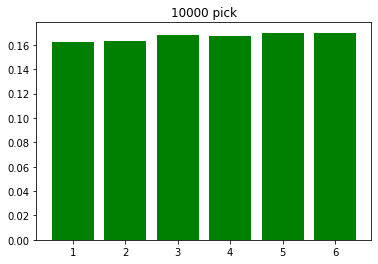

In [41]:
res_of_10000pick = do_dice(10000) # 10000번시행
plt.bar(list(res_of_10000pick.keys()), res_of_10000pick.values(), color='g')
plt.title("10000 pick")
plt.show()

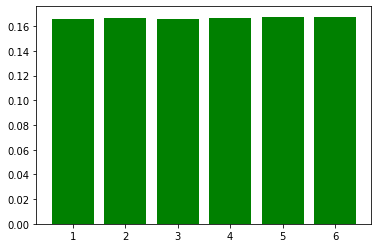

In [44]:
res_of_100000pick = do_dice(100000) # 10000번시행
plt.bar(list(res_of_100000pick.keys()), res_of_100000pick.values(), color='g')
plt.show()

# MCM을 이용한 And gate 모델

In [45]:
# AND gate 문제 풀이 by MCM
X = [[0,0], [0,1], [1,0], [1,1]] #준비된 X 데이터
Y = [0, 0, 0, 1]                 #준비된 Y 데이터

def do_mcm(X, Y, count):
    W = [0, 0] #초기 weight는 기본값
    b = [0]    #초기 bias도 기본값

    loss = 1000000 #초기 loss는 나올 수 없는 큰값
    for _ in range(count):
        W_new = [np.random.uniform(-500, 500), np.random.uniform(-500, 500)] # W를 -500~500 범위에서 랜덤으로 2개 추출
        b_new = [np.random.uniform(-500, 500)]                           # b를 -500~500 범위에서 랜덤으로 1개 추출
        
        Hx = [perceptron(x, W_new, b_new[0], lambda x:x>=0) for x, y in zip(X, Y)] #기존 perceptron 함수에 
                                                                                  #신규 W와 b를 모든 X에 대해 실행
        loss_new = sum((hx - y)**2.0 for hx, y in zip(Hx, Y))/len(Y)    #모든 Y와 h(x)의 실제 loss를 얻어냄
        
        if loss > loss_new:                      #과거 loss보다 신규 loss가 더 작으면 더 우수해진 것
            print('현재 오차:', loss_new)        # 신규 w, b, loss를 사용하게 교체
            loss = loss_new
            W = W_new
            b = b_new
            
    return W, b

In [47]:
W, b = do_mcm(X, Y, 1) # 1번 시행한 mcm 모델
print(perceptron([0, 0], W, b[0], lambda x:x>=0)) #0, 0
print(perceptron([0, 1], W, b[0], lambda x:x>=0)) #0, 1
print(perceptron([1, 0], W, b[0], lambda x:x>=0)) #1, 0
print(perceptron([1, 1], W, b[0], lambda x:x>=0)) #1, 1


현재 오차: 0.25
False
True
False
True


In [53]:
W, b = do_mcm(X, Y, 10) # 10번 시행한 mcm 모델
print(perceptron([0, 0], W, b[0], lambda x:x>=0)) #0, 0
print(perceptron([0, 1], W, b[0], lambda x:x>=0)) #0, 1
print(perceptron([1, 0], W, b[0], lambda x:x>=0)) #1, 0
print(perceptron([1, 1], W, b[0], lambda x:x>=0)) #1, 1

현재 오차: 0.25
현재 오차: 0.0
False
False
False
True


In [57]:
W, b = do_mcm(X, Y, 100) # 100번 시행한 mcm 모델
print(perceptron([0, 0], W, b[0], lambda x:x>=0)) #0, 0
print(perceptron([0, 1], W, b[0], lambda x:x>=0)) #0, 1
print(perceptron([1, 0], W, b[0], lambda x:x>=0)) #1, 0
print(perceptron([1, 1], W, b[0], lambda x:x>=0)) #1, 1

현재 오차: 1.0
현재 오차: 0.75
현재 오차: 0.5
현재 오차: 0.25
현재 오차: 0.0
False
False
False
True


In [58]:
W, b = do_mcm(X, Y, 1000) # 1000번 시행한 mcm 모델
print(perceptron([0, 0], W, b[0], lambda x:x>=0)) #0, 0
print(perceptron([0, 1], W, b[0], lambda x:x>=0)) #0, 1
print(perceptron([1, 0], W, b[0], lambda x:x>=0)) #1, 0
print(perceptron([1, 1], W, b[0], lambda x:x>=0)) #1, 1

현재 오차: 0.5
현재 오차: 0.25
현재 오차: 0.0
False
False
False
True


In [60]:
W, b = do_mcm(X, Y, 10000) # 10000번 시행한 mcm 모델
print(perceptron([0, 0], W, b[0], lambda x:x>=0)) #0, 0
print(perceptron([0, 1], W, b[0], lambda x:x>=0)) #0, 1
print(perceptron([1, 0], W, b[0], lambda x:x>=0)) #1, 0
print(perceptron([1, 1], W, b[0], lambda x:x>=0)) #1, 1

현재 오차: 0.5
현재 오차: 0.25
현재 오차: 0.0
False
False
False
True


# tensorflow를 이용한 And gate 모델

In [63]:
#tensorflow를 이용한 and gate 풀이
import tensorflow as tf
import numpy as np

X = np.array([[0.,0], [0,1], [1,0], [1,1]])
Y = np.array([[0.], [0], [0], [1]])         

In [64]:
# tf.plaaceholder로 외부에서 주입될 tensor를 정의할 수 있음
x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 1])

W = tf.Variable(tf.random.uniform([2, 1]))
b = tf.Variable(tf.zeros([1]))
h = tf.nn.sigmoid(tf.matmul(x, W) + b)

In [65]:
#loss 및 gd 설정
diff = tf.losses.mean_squared_error(y, h)
a = 0.1
train_step = tf.train.GradientDescentOptimizer(a).minimize(diff)

In [68]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 500번을 학습셋에 대하여 gd를 수행
for i in range(500):
    batch_xs, batch_ys = X, Y
    _, loss = sess.run([train_step, diff], feed_dict={x: batch_xs, y: batch_ys})
    if i % 50 == 0:
        print('%d번 실행 후 오차:%f' % (i+1, np.sum(loss)))
    

accuracy = tf.reduce_mean(tf.cast(tf.equal(y, tf.cast(h > 0.5, tf.float32)), tf.float32))
print('정확도:', sess.run(accuracy, feed_dict={x: X, y: Y}))

1번 실행 후 오차:0.286439
51번 실행 후 오차:0.174991
101번 실행 후 오차:0.148993
151번 실행 후 오차:0.135257
201번 실행 후 오차:0.124529
251번 실행 후 오차:0.115487
301번 실행 후 오차:0.107715
351번 실행 후 오차:0.100955
401번 실행 후 오차:0.095013
451번 실행 후 오차:0.089741
정확도: 1.0


In [69]:
#사용자가 직접 numpy값을 전달하여 결과를 볼 수 있음
print("0,0 -> ", sess.run(h, feed_dict={x: np.array([[0,0]])})) # 0, 0 입력
print("0,1 -> ", sess.run(h, feed_dict={x: np.array([[0,1]])})) # 0, 1 입력
print("1,0 -> ", sess.run(h, feed_dict={x: np.array([[1,0]])})) # 1, 0 입력
print("1,1 -> ", sess.run(h, feed_dict={x: np.array([[1,1]])})) # 1, 1 입력

0,0 ->  [[0.10310044]]
0,1 ->  [[0.2911556]]
1,0 ->  [[0.3048338]]
1,1 ->  [[0.6104199]]


# keras를 이용한 And gate 모델

In [71]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

model = Sequential() # keras 순차 모델 정의
model.add(Dense(1, input_shape=(2,), activation='sigmoid')) # 모델에 perceptron을 하나 추가, activation 설정


model.compile(loss='mse', optimizer=SGD(lr=0.1), metrics=['accuracy']) #gd의 a를 0.1로 설정, loss에 mse사용, 정확도 확인
hist = model.fit(X,Y, epochs=500, verbose=1, ) #X와 Y에 대하여 500번 학습, 학습 정보 끔 (verbose 0)

#for idx, loss in enumerate(hist.history['loss'][::50]):
#    print('%d번 실행 후 오차:%f' % ((idx*50+1), loss))
    
loss, acc = model.evaluate(X,Y)  #X, Y 에 대하여 모델 평가를 진행함
print('정확도:', acc)

Epoch 1/500
4/4 [==============================] - 0s 52ms/step - loss: 0.2887 - acc: 0.7500
Epoch 2/500
4/4 [==============================] - 0s 232us/step - loss: 0.2886 - acc: 0.7500
Epoch 3/500
4/4 [==============================] - 0s 286us/step - loss: 0.2886 - acc: 0.7500
Epoch 4/500
4/4 [==============================] - 0s 213us/step - loss: 0.2885 - acc: 0.7500
Epoch 5/500
4/4 [==============================] - 0s 284us/step - loss: 0.2884 - acc: 0.7500
Epoch 6/500
4/4 [==============================] - 0s 337us/step - loss: 0.2884 - acc: 0.7500
Epoch 7/500
4/4 [==============================] - 0s 252us/step - loss: 0.2883 - acc: 0.7500
Epoch 8/500
4/4 [==============================] - 0s 312us/step - loss: 0.2883 - acc: 0.7500
Epoch 9/500
4/4 [==============================] - 0s 307us/step - loss: 0.2882 - acc: 0.7500
Epoch 10/500
4/4 [==============================] - 0s 289us/step - loss: 0.2881 - acc: 0.7500
Epoch 11/500
4/4 [==============================] - 0s 281us

Epoch 88/500
4/4 [==============================] - 0s 314us/step - loss: 0.2837 - acc: 0.7500
Epoch 89/500
4/4 [==============================] - 0s 320us/step - loss: 0.2837 - acc: 0.7500
Epoch 90/500
4/4 [==============================] - 0s 275us/step - loss: 0.2836 - acc: 0.7500
Epoch 91/500
4/4 [==============================] - 0s 279us/step - loss: 0.2836 - acc: 0.7500
Epoch 92/500
4/4 [==============================] - 0s 311us/step - loss: 0.2835 - acc: 0.7500
Epoch 93/500
4/4 [==============================] - 0s 328us/step - loss: 0.2835 - acc: 0.7500
Epoch 94/500
4/4 [==============================] - 0s 310us/step - loss: 0.2834 - acc: 0.7500
Epoch 95/500
4/4 [==============================] - 0s 367us/step - loss: 0.2834 - acc: 0.7500
Epoch 96/500
4/4 [==============================] - 0s 348us/step - loss: 0.2833 - acc: 0.7500
Epoch 97/500
4/4 [==============================] - 0s 321us/step - loss: 0.2833 - acc: 0.7500
Epoch 98/500
4/4 [==============================] 

Epoch 174/500
4/4 [==============================] - 0s 320us/step - loss: 0.2792 - acc: 0.7500
Epoch 175/500
4/4 [==============================] - 0s 273us/step - loss: 0.2792 - acc: 0.7500
Epoch 176/500
4/4 [==============================] - 0s 306us/step - loss: 0.2791 - acc: 0.7500
Epoch 177/500
4/4 [==============================] - 0s 304us/step - loss: 0.2791 - acc: 0.7500
Epoch 178/500
4/4 [==============================] - 0s 335us/step - loss: 0.2790 - acc: 0.7500
Epoch 179/500
4/4 [==============================] - 0s 355us/step - loss: 0.2790 - acc: 0.7500
Epoch 180/500
4/4 [==============================] - 0s 295us/step - loss: 0.2789 - acc: 0.7500
Epoch 181/500
4/4 [==============================] - 0s 342us/step - loss: 0.2789 - acc: 0.7500
Epoch 182/500
4/4 [==============================] - 0s 386us/step - loss: 0.2788 - acc: 0.7500
Epoch 183/500
4/4 [==============================] - 0s 255us/step - loss: 0.2788 - acc: 0.7500
Epoch 184/500
4/4 [=====================

Epoch 260/500
4/4 [==============================] - 0s 262us/step - loss: 0.2751 - acc: 0.7500
Epoch 261/500
4/4 [==============================] - 0s 298us/step - loss: 0.2750 - acc: 0.7500
Epoch 262/500
4/4 [==============================] - 0s 349us/step - loss: 0.2750 - acc: 0.7500
Epoch 263/500
4/4 [==============================] - 0s 309us/step - loss: 0.2749 - acc: 0.7500
Epoch 264/500
4/4 [==============================] - 0s 354us/step - loss: 0.2749 - acc: 0.7500
Epoch 265/500
4/4 [==============================] - 0s 373us/step - loss: 0.2748 - acc: 0.7500
Epoch 266/500
4/4 [==============================] - 0s 311us/step - loss: 0.2748 - acc: 0.7500
Epoch 267/500
4/4 [==============================] - 0s 353us/step - loss: 0.2747 - acc: 0.7500
Epoch 268/500
4/4 [==============================] - 0s 325us/step - loss: 0.2747 - acc: 0.7500
Epoch 269/500
4/4 [==============================] - 0s 274us/step - loss: 0.2746 - acc: 0.7500
Epoch 270/500
4/4 [=====================

Epoch 346/500
4/4 [==============================] - 0s 277us/step - loss: 0.2712 - acc: 0.7500
Epoch 347/500
4/4 [==============================] - 0s 305us/step - loss: 0.2711 - acc: 0.7500
Epoch 348/500
4/4 [==============================] - 0s 314us/step - loss: 0.2711 - acc: 0.7500
Epoch 349/500
4/4 [==============================] - 0s 362us/step - loss: 0.2711 - acc: 0.7500
Epoch 350/500
4/4 [==============================] - 0s 336us/step - loss: 0.2710 - acc: 0.7500
Epoch 351/500
4/4 [==============================] - 0s 290us/step - loss: 0.2710 - acc: 0.7500
Epoch 352/500
4/4 [==============================] - 0s 310us/step - loss: 0.2709 - acc: 0.7500
Epoch 353/500
4/4 [==============================] - 0s 340us/step - loss: 0.2709 - acc: 0.7500
Epoch 354/500
4/4 [==============================] - 0s 369us/step - loss: 0.2708 - acc: 0.7500
Epoch 355/500
4/4 [==============================] - 0s 271us/step - loss: 0.2708 - acc: 0.7500
Epoch 356/500
4/4 [=====================

Epoch 432/500
4/4 [==============================] - 0s 275us/step - loss: 0.2676 - acc: 0.7500
Epoch 433/500
4/4 [==============================] - 0s 284us/step - loss: 0.2675 - acc: 0.7500
Epoch 434/500
4/4 [==============================] - 0s 334us/step - loss: 0.2675 - acc: 0.7500
Epoch 435/500
4/4 [==============================] - 0s 261us/step - loss: 0.2674 - acc: 0.7500
Epoch 436/500
4/4 [==============================] - 0s 303us/step - loss: 0.2674 - acc: 0.7500
Epoch 437/500
4/4 [==============================] - 0s 324us/step - loss: 0.2674 - acc: 0.7500
Epoch 438/500
4/4 [==============================] - 0s 288us/step - loss: 0.2673 - acc: 0.7500
Epoch 439/500
4/4 [==============================] - 0s 411us/step - loss: 0.2673 - acc: 0.7500
Epoch 440/500
4/4 [==============================] - 0s 289us/step - loss: 0.2672 - acc: 0.7500
Epoch 441/500
4/4 [==============================] - 0s 251us/step - loss: 0.2672 - acc: 0.7500
Epoch 442/500
4/4 [=====================

In [73]:
print("0,0 -> ", model.predict(np.array(   [  [0,0], [1,1]   ]  ))) # 0, 0 입력
#print("0,1 -> ", model.predict(np.array([[0,1]]))) # 0, 1 입력
#print("1,0 -> ", model.predict(np.array([[1,0]]))) # 1, 0 입력
#print("1,1 -> ", model.predict(np.array([[1,1]]))) # 1, 1 입력

0,0 ->  [[0.42630932]
 [0.13572358]]


# 집값 예측 - Multi-variable linear regression

* from kaggle https://www.kaggle.com/c/house-prices-advanced-regression-techniques
* 집에 대한 80가지 컬럼과 가격을 나타내는 데이터
* 1460개의 집에 대한 데이터와 가격이 주어짐
* 최대한 정확하게 예측하는 문제
* 완전 정확하게 예측할 수는 없으므로 평가는 loss가 적은 순위로 부여

<center><img src='img/04_08.png' width=40% height=40%></center>

In [78]:
import pandas as pd
data = pd.read_csv('data/house-prices/train.csv', sep=',')
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [79]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# 데이터 정제

* 데이터 컬럼이 너무 많고, 우리의 목적은 kaggle에 나가서 순위권에 드는 것이 아님!
* 카테고리형 데이터를 최대한 지우고, 숫자형 데이터만을 축약해본다.
* 단, saleType은 salePrice (Y)를 결정할 수도 있어보이는 변수니 컬럼형으로 변화 시킴
* 컬럼 중 빈값을 포함하고 있는 row가 있다면 과감하게 제거
* 상관분석을 고려하여 중요해보이는 컬럼 10개 정도만을 가지고 시도해보자

In [80]:
df = data[['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
      'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
      'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
      'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
      'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
      'MiscVal', 'MoSold', 'YrSold', 'SalePrice']]
df.head(5)

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,8450,7,5,2003,2003,706,0,150,856,856,...,0,61,0,0,0,0,0,2,2008,208500
1,9600,6,8,1976,1976,978,0,284,1262,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,11250,7,5,2001,2002,486,0,434,920,920,...,0,42,0,0,0,0,0,9,2008,223500
3,9550,7,5,1915,1970,216,0,540,756,961,...,0,35,272,0,0,0,0,2,2006,140000
4,14260,8,5,2000,2000,655,0,490,1145,1145,...,192,84,0,0,0,0,0,12,2008,250000


In [81]:
# row에 빈값이 있으면 제거
print('원본 row수:', len(df))
df = df.dropna()
print('변경 row수:', len(df))

원본 row수: 1460
변경 row수: 1379


# 상관분석이란 무엇인가?

* $x_n$이 주어질 때, 지정한 변수간, 예를들어 $x_1$과 $x_2$이 증가나 감소 방향이<br> 어떤 선형적 관계를 가지고 있는지 분석하는 방법
* 예를 들면, 집값, 평형, 화장실 개수의 경우 서로 선형적 증가 관계가 있을 것이라고 예측 할 수 있음

<br>

* 상관분석($x_1$, $x_2$)의 결과는 -1 부터 1의 결과를 출력하며 다음과 같은 관계가 있음
 * 0에 가까울수록 서로 독립적
 * 1에 가까울수록 서로 양의 상관관계
 * -1에 가까울수록 서로 음의 상관관계

<center><img src='img/04_10.png' width=40% height=40%></center>

In [203]:
# 집 가격에 대하여 상관관계 분석을 한 뒤 음양의 상관관계에 관계 없이 0.5 이상의 상관을 가지고 있으면 추출
cor = df.corr()
cor_target = abs(cor["SalePrice"])
relevant_features = cor_target[cor_target>0.5]
relevant_features

OverallQual     0.787228
YearBuilt       0.507584
YearRemodAdd    0.505434
TotalBsmtSF     0.603583
1stFlrSF        0.594935
GrLivArea       0.708172
FullBath        0.556550
TotRmsAbvGrd    0.538309
GarageCars      0.637095
GarageArea      0.608405
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [82]:
#상관이 높은 컬럼을 몇개 추출
df = df[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
      'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice']]
df.head(5)

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,7,2003,2003,856,856,1710,2,8,2,548,208500
1,6,1976,1976,1262,1262,1262,2,6,2,460,181500
2,7,2001,2002,920,920,1786,2,6,2,608,223500
3,7,1915,1970,756,961,1717,1,7,3,642,140000
4,8,2000,2000,1145,1145,2198,2,9,3,836,250000


In [86]:
# 학습셋을 구성하기 위하여 자료의 70%를 학습셋, 30%를 테스트셋으로 구분
train = df.sample(frac=0.7)
test = df.drop(train.index)
print(len(df), len(train), len(test))

1379 965 414


In [87]:
#각 데이터를 x와 y로 구분
train_x, train_y = np.split(train, [-1], axis=1)
test_x, test_y = np.split(test, [-1], axis=1)
print(train_x.shape, train_y.shape)

(965, 10) (965, 1)


In [207]:
#keras 다변수 집값 모델 구현
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

model = Sequential()
#입력이 2에서 10으로 늘어난 것만 변경이 있었고 activation이 linear가 되었음
model.add(Dense(1, input_shape=(10,), activation='linear'))
model.compile(loss='mse', optimizer=SGD(lr=0.01))
hist = model.fit(train_x, train_y, epochs=500, verbose=1)

Epoch 1/500
965/965 [==============================] - 0s 380us/step - loss: nan       
Epoch 2/500
965/965 [==============================] - 0s 24us/step - loss: nan
Epoch 3/500
965/965 [==============================] - 0s 27us/step - loss: nan
Epoch 4/500
965/965 [==============================] - 0s 26us/step - loss: nan
Epoch 5/500
965/965 [==============================] - 0s 24us/step - loss: nan
Epoch 6/500
965/965 [==============================] - 0s 27us/step - loss: nan
Epoch 7/500
965/965 [==============================] - 0s 26us/step - loss: nan
Epoch 8/500
965/965 [==============================] - 0s 27us/step - loss: nan
Epoch 9/500
965/965 [==============================] - 0s 30us/step - loss: nan
Epoch 10/500
965/965 [==============================] - 0s 26us/step - loss: nan
Epoch 11/500
965/965 [==============================] - 0s 26us/step - loss: nan
Epoch 12/500
965/965 [==============================] - 0s 25us/step - loss: nan
Epoch 13/500
965/965 [=======

965/965 [==============================] - 0s 25us/step - loss: nan
Epoch 103/500
965/965 [==============================] - 0s 28us/step - loss: nan
Epoch 104/500
965/965 [==============================] - 0s 28us/step - loss: nan
Epoch 105/500
965/965 [==============================] - 0s 24us/step - loss: nan
Epoch 106/500
965/965 [==============================] - 0s 23us/step - loss: nan
Epoch 107/500
965/965 [==============================] - 0s 24us/step - loss: nan
Epoch 108/500
965/965 [==============================] - 0s 24us/step - loss: nan
Epoch 109/500
965/965 [==============================] - 0s 23us/step - loss: nan
Epoch 110/500
965/965 [==============================] - 0s 23us/step - loss: nan
Epoch 111/500
965/965 [==============================] - 0s 22us/step - loss: nan
Epoch 112/500
965/965 [==============================] - 0s 24us/step - loss: nan
Epoch 113/500
965/965 [==============================] - 0s 23us/step - loss: nan
Epoch 114/500
965/965 [=======

965/965 [==============================] - 0s 23us/step - loss: nan
Epoch 203/500
965/965 [==============================] - 0s 24us/step - loss: nan
Epoch 204/500
965/965 [==============================] - 0s 24us/step - loss: nan
Epoch 205/500
965/965 [==============================] - 0s 24us/step - loss: nan
Epoch 206/500
965/965 [==============================] - 0s 24us/step - loss: nan
Epoch 207/500
965/965 [==============================] - 0s 23us/step - loss: nan
Epoch 208/500
965/965 [==============================] - 0s 23us/step - loss: nan
Epoch 209/500
965/965 [==============================] - 0s 24us/step - loss: nan
Epoch 210/500
965/965 [==============================] - 0s 26us/step - loss: nan
Epoch 211/500
965/965 [==============================] - 0s 26us/step - loss: nan
Epoch 212/500
965/965 [==============================] - 0s 26us/step - loss: nan
Epoch 213/500
965/965 [==============================] - 0s 25us/step - loss: nan
Epoch 214/500
965/965 [=======

965/965 [==============================] - 0s 22us/step - loss: nan
Epoch 303/500
965/965 [==============================] - 0s 23us/step - loss: nan
Epoch 304/500
965/965 [==============================] - 0s 24us/step - loss: nan
Epoch 305/500
965/965 [==============================] - 0s 24us/step - loss: nan
Epoch 306/500
965/965 [==============================] - 0s 23us/step - loss: nan
Epoch 307/500
965/965 [==============================] - 0s 23us/step - loss: nan
Epoch 308/500
965/965 [==============================] - 0s 23us/step - loss: nan
Epoch 309/500
965/965 [==============================] - 0s 24us/step - loss: nan
Epoch 310/500
965/965 [==============================] - 0s 24us/step - loss: nan
Epoch 311/500
965/965 [==============================] - 0s 22us/step - loss: nan
Epoch 312/500
965/965 [==============================] - 0s 24us/step - loss: nan
Epoch 313/500
965/965 [==============================] - 0s 23us/step - loss: nan
Epoch 314/500
965/965 [=======

965/965 [==============================] - 0s 23us/step - loss: nan
Epoch 403/500
965/965 [==============================] - 0s 26us/step - loss: nan
Epoch 404/500
965/965 [==============================] - 0s 28us/step - loss: nan
Epoch 405/500
965/965 [==============================] - 0s 26us/step - loss: nan
Epoch 406/500
965/965 [==============================] - 0s 26us/step - loss: nan
Epoch 407/500
965/965 [==============================] - 0s 25us/step - loss: nan
Epoch 408/500
965/965 [==============================] - 0s 28us/step - loss: nan
Epoch 409/500
965/965 [==============================] - 0s 27us/step - loss: nan
Epoch 410/500
965/965 [==============================] - 0s 27us/step - loss: nan
Epoch 411/500
965/965 [==============================] - 0s 27us/step - loss: nan
Epoch 412/500
965/965 [==============================] - 0s 25us/step - loss: nan
Epoch 413/500
965/965 [==============================] - 0s 26us/step - loss: nan
Epoch 414/500
965/965 [=======

# 잘되지 않는 이유는 무엇일까?

* 해당 모델은 다음과 같은 수식으로 정의 될 수 있음

\begin{align}
h(x_1, x_2, x_3 \dots x_{10}) = w_1x_1 + w_2x_2 + w_3x_3 + \dots + w_{10}x_{10} + b \nonumber
\end{align}

* 각 $w$들은 대략 아주 크지 않은 숫자의 범위에서 초기값을 가짐
* 예를 들어 다음과 같음

\begin{align}
h(x_1, x_2, x_3 \dots x_{10}) &= 0.1x_1 -2.2x_2 + 5.3x_3 + \dots -5.3x_{10} + 0.5 \nonumber
\end{align}

* 하지만, 어떤 데이터들의 경우 $x_n$간의 범위 차이가 수십배, 수천배가 날 수 있음
* 예를들어 다음과 같음

\begin{align}
h(x_1, x_2, x_3 \dots x_{10}) &= w_10.5 + w_{2}2000 + w_{3}0.002312 + \dots + w_{10}123125412 -2.432 \nonumber
\end{align}

* 수천배 이상 스케일을 가진 x의 weight가 반복적으로 증가하여 컴퓨터의 계산 범위를 초과하면 nan을 출력 할 수 있음
* 이런 현상을 gradient exploding이라고 함
* 여러가지 해결책 중 간단한 방법은 변수들의 스케일을 조정해주면 됨

# Min Max Normalize

* 임의의 스케일을 가진 데이터에서 같은 도메인 기준으로 가장 작은 값과 가장 큰 값을 이용하여 0~1으로 범위를 변경하는 방법

$$ norm({x_i}) = \frac{x_i - x_{min}}{x_{max} - x_{min}} \nonumber $$

In [83]:
def minmax_norm(x):
    max_x = np.max(x)
    min_x = np.min(x)
    
    return (x - min_x)/(max_x-min_x)

In [84]:
# 1~5의 데이터에 minmax norm을 취한 결과
print(minmax_norm([1,2,3,4,5]))

[0.   0.25 0.5  0.75 1.  ]


In [88]:
#x의 데이터를 출력해봄
train_x.head(5)

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
659,5,1964,1999,1486,1486,1486,1,7,2,480
709,5,1966,1966,876,904,904,1,6,1,408
702,8,2006,2006,1234,1264,2576,2,10,3,666
326,8,1993,1993,1719,1719,1719,1,6,2,473
52,5,1963,1963,816,816,816,1,5,2,516


In [89]:
#norm된 x의 데이터를 출력해봄
train_x.apply(minmax_norm, axis=0).head(5)

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
659,0.375,0.651163,0.816667,0.243208,0.246356,0.201384,0.333333,0.444444,0.333333,0.254372
709,0.375,0.666667,0.266667,0.143372,0.109544,0.089547,0.333333,0.333333,0.000000,0.197138
702,0.750,0.976744,0.933333,0.201964,0.194170,0.410838,0.666667,0.777778,0.666667,0.402226
326,0.750,0.875969,0.716667,0.281342,0.301128,0.246157,0.333333,0.333333,0.333333,0.248808
52,0.375,0.643411,0.216667,0.133552,0.088858,0.072636,0.333333,0.222222,0.333333,0.282989


In [90]:
#y의 데이터를 출력해봄
train_y.head(5)

,SalePrice
659,167000
709,109900
702,361919
326,324000
52,110000


In [91]:
#norm된 y의 데이터를 출력해봄
train_y.apply(minmax_norm, axis=0).head(5)

,SalePrice
659,0.195089
709,0.094739
702,0.537649
326,0.471008
52,0.094914


In [98]:
#MinMaxScaler는 각 변수를 row별로 분석하여 최대 값으로 현재 값을 나눠주어 0~1사이로 값을 변경함
from sklearn.preprocessing import MinMaxScaler
minmaxer_x = MinMaxScaler()
minmaxer_y = MinMaxScaler()
minmaxer_x.fit(train_x)
minmaxer_y.fit(train_y)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [99]:
columns_x = train_x.columns
columns_y = train_y.columns
train_x = minmaxer_x.transform(train_x)
train_x = pd.DataFrame(train_x, columns=columns_x)
train_y = minmaxer_y.transform(train_y)
train_y = pd.DataFrame(train_y, columns=columns_y)

In [100]:
#x의 데이터를 출력해봄
train_x.head(5)

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
0,0.375,0.651163,0.816667,0.243208,0.246356,0.201384,0.333333,0.444444,0.333333,0.254372
1,0.375,0.666667,0.266667,0.143372,0.109544,0.089547,0.333333,0.333333,0.000000,0.197138
2,0.750,0.976744,0.933333,0.201964,0.194170,0.410838,0.666667,0.777778,0.666667,0.402226
3,0.750,0.875969,0.716667,0.281342,0.301128,0.246157,0.333333,0.333333,0.333333,0.248808
4,0.375,0.643411,0.216667,0.133552,0.088858,0.072636,0.333333,0.222222,0.333333,0.282989


In [101]:
#y의 데이터를 출력해봄
train_y.head(5)

,SalePrice
0,0.195089
1,0.094739
2,0.537649
3,0.471008
4,0.094914


In [102]:
#똑같이 모델을 다시 돌려본다
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(1, input_shape=(10,), activation='linear'))
model.compile(loss='mse', optimizer=SGD(lr=0.01))
hist = model.fit(train_x, train_y, epochs=500, verbose=1)

Epoch 1/500
965/965 [==============================] - 0s 253us/step - loss: 0.0684
Epoch 2/500
965/965 [==============================] - 0s 24us/step - loss: 0.0341
Epoch 3/500
965/965 [==============================] - 0s 24us/step - loss: 0.0328
Epoch 4/500
965/965 [==============================] - 0s 25us/step - loss: 0.0321
Epoch 5/500
965/965 [==============================] - 0s 23us/step - loss: 0.0314
Epoch 6/500
965/965 [==============================] - 0s 24us/step - loss: 0.0309
Epoch 7/500
965/965 [==============================] - 0s 25us/step - loss: 0.0302
Epoch 8/500
965/965 [==============================] - 0s 23us/step - loss: 0.0297
Epoch 9/500
965/965 [==============================] - 0s 24us/step - loss: 0.0291
Epoch 10/500
965/965 [==============================] - 0s 23us/step - loss: 0.0286
Epoch 11/500
965/965 [==============================] - 0s 24us/step - loss: 0.0282
Epoch 12/500
965/965 [==============================] - 0s 24us/step - loss: 0.0277


965/965 [==============================] - 0s 25us/step - loss: 0.0074
Epoch 195/500
965/965 [==============================] - 0s 25us/step - loss: 0.0073
Epoch 196/500
965/965 [==============================] - 0s 23us/step - loss: 0.0073
Epoch 197/500
965/965 [==============================] - 0s 24us/step - loss: 0.0073
Epoch 198/500
965/965 [==============================] - 0s 22us/step - loss: 0.0073
Epoch 199/500
965/965 [==============================] - 0s 24us/step - loss: 0.0073
Epoch 200/500
965/965 [==============================] - 0s 24us/step - loss: 0.0072
Epoch 201/500
965/965 [==============================] - 0s 23us/step - loss: 0.0072
Epoch 202/500
965/965 [==============================] - 0s 23us/step - loss: 0.0072
Epoch 203/500
965/965 [==============================] - 0s 22us/step - loss: 0.0072
Epoch 204/500
965/965 [==============================] - 0s 22us/step - loss: 0.0072
Epoch 205/500
965/965 [==============================] - 0s 23us/step - loss: 0

965/965 [==============================] - 0s 22us/step - loss: 0.0055
Epoch 387/500
965/965 [==============================] - 0s 22us/step - loss: 0.0056
Epoch 388/500
965/965 [==============================] - 0s 21us/step - loss: 0.0056
Epoch 389/500
965/965 [==============================] - 0s 21us/step - loss: 0.0055
Epoch 390/500
965/965 [==============================] - 0s 22us/step - loss: 0.0055
Epoch 391/500
965/965 [==============================] - 0s 20us/step - loss: 0.0055
Epoch 392/500
965/965 [==============================] - 0s 21us/step - loss: 0.0055
Epoch 393/500
965/965 [==============================] - 0s 22us/step - loss: 0.0055
Epoch 394/500
965/965 [==============================] - 0s 21us/step - loss: 0.0055
Epoch 395/500
965/965 [==============================] - 0s 21us/step - loss: 0.0055
Epoch 396/500
965/965 [==============================] - 0s 22us/step - loss: 0.0055
Epoch 397/500
965/965 [==============================] - 0s 21us/step - loss: 0

In [103]:
idx = 9
x = minmaxer_x.transform(np.expand_dims(test_x.iloc[idx], axis=0))
y = model.predict(x)
print('정답:', test_y.iloc[idx][0], ', 예측:', minmaxer_y.inverse_transform(y)[0][0])
print('차이:',  test_y.iloc[idx][0] - minmaxer_y.inverse_transform(y)[0][0])

정답: 130250 , 예측: 383.90347
차이: 129866.09652709961


/Users/kakao/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


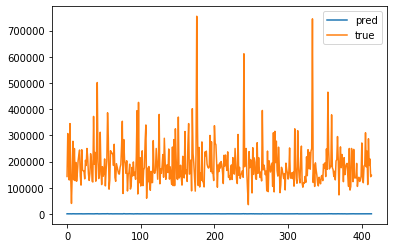

In [104]:
xs = minmaxer_x.transform(test_x)
ys = minmaxer_y.inverse_transform(model.predict(xs))
plt.plot(ys, label='pred')
plt.plot(test_y.as_matrix(), label='true')
plt.legend()
plt.show()

# 시험 합격 - Logistic Regression

* 시험 합격 결과에 대한 2가지(잠잔 시간, 공부한 시간)이 주어짐
* 100개의 합격 결과 X와 2가지 정보 Y가 주어짐
* 합격 결과는 0/1 binary classification으로 나타낼 수 있음

# Regression to Classification

* $w^Tx = y$에 sigmoid activation을 씌우면 y는 0~1의 사의값을 가지게 됨
* threshold라는 기준보다 크면 1, 작으면 0으로 회귀를 분류 문제로 변경 가능

<center><img src='img/04_09.png' width=50% height=50%></center>

In [107]:

import pandas as pd
df = pd.read_csv('data/exam-pass/data_classification.csv', sep=',', names=['Studied', 'Slept', 'Passed'])
df.head(5)

,Studied,Slept,Passed
0,4.855064,9.639962,1
1,8.625440,0.058927,0
2,3.828192,0.723199,0
3,7.150955,3.899420,1
4,6.477900,8.198181,1


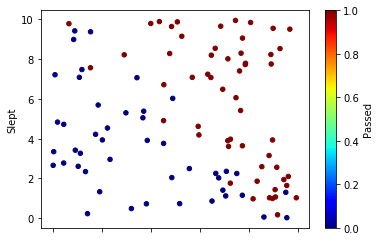

In [108]:
df.plot.scatter(x='Studied', y='Slept', c='Passed', colormap='jet')

In [109]:
# 학습셋을 구성하기 위하여 자료의 70%를 학습셋, 30%를 테스트셋으로 구분
train = df.sample(frac=0.7)
test = df.drop(train.index)
print(len(df), len(train), len(test))

100 70 30


In [230]:
#모델을 돌려본다
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Lambda
from keras.optimizers import SGD
from keras import backend as K

model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.compile(loss='mse', optimizer=SGD(lr=0.01), metrics=['accuracy'])
hist = model.fit(train.iloc[:,:2], train.iloc[:,2], epochs=7000, verbose=0)

In [231]:
loss, acc = model.evaluate(test.iloc[:,:2], test.iloc[:,2])
print('정확도:', acc)

30/30 [==============================] - 0s 5ms/step
정확도: 0.8999999761581421


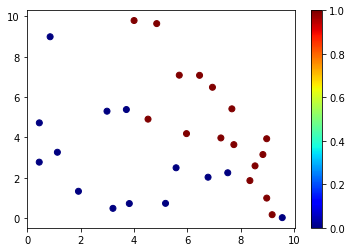

In [232]:
import matplotlib.pylab as plt
plt.scatter(x=test.iloc[:,0], y=test.iloc[:,1], c=test.iloc[:,2], cmap='jet')
plt.colorbar()

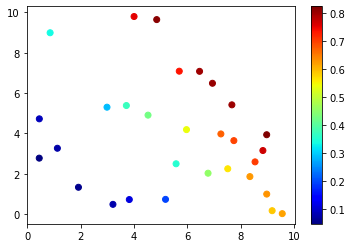

In [233]:
pred = model.predict(test.iloc[:,:2])
plt.scatter(x=test.iloc[:,0], y=test.iloc[:,1], c=pred[:,0], cmap='jet')
plt.colorbar()

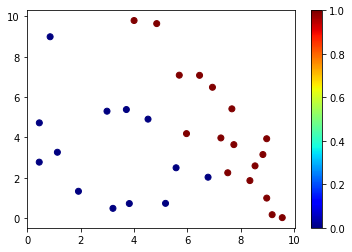

In [234]:
pred = model.predict(test.iloc[:,:2])
plt.scatter(x=test.iloc[:,0], y=test.iloc[:,1], c=pred[:,0] > 0.5, cmap='jet')
plt.colorbar()

# Test yourself

* OR gate 모델을 keras로 만들어 보시오.
* NOT gate 모델을 만들어 보시오.
 * NOT gate 모델은 1이 들어가면 0을 출력 0이 들어가면 1을 출력하는 모델이라고 가정
* Logistic Regression 모델을 이용하여 AND gate을 만들어 보시오.